In [2]:
%load_ext autoreload
%autoreload 2
import sys
import pandas as pd
import os
import matplotlib.pyplot as plt
import cortex
from os.path import join
from collections import defaultdict
import numpy as np
import joblib
from tqdm import tqdm
import sys
from copy import deepcopy
sys.path.append('../notebooks')
from neuro.config import repo_dir, PROCESSED_DIR
from neuro import viz, analyze_helper
from neuro.features.questions.gpt4 import QS_35_STABLE
from neurosynth import term_dict, term_dict_rev, get_neurosynth_flatmaps
neurosynth_compare = __import__('04_neurosynth_compare')
import viz
import neurosynth
from cortex import mni
import os
from neuro.config import repo_dir, PROCESSED_DIR, setup_freesurfer
setup_freesurfer()

Note, this notebook requires first running `03_export_qa_flatmaps.ipynb` into `df_qa_dict.pkl` files for each subject.

### compute correlations with qa flatmaps and plot avgs

settings ['individual_gpt4_ndel=1_pc_new']


  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:00<00:00, 13.64it/s]


num common qs 21


100%|██████████| 3/3 [00:52<00:00, 17.42s/it]


mean corr 0.13854652528562172
UTS01 corr 0.10936628918958495
UTS02 corr 0.15905421617075438
UTS03 corr 0.1472190704965257


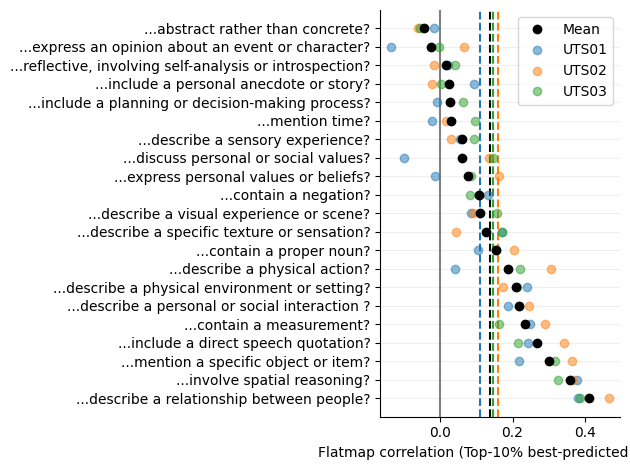

In [5]:
# setting = 'shapley_neurosynth'
# setting = 'full_neurosynth'
# setting = 'individual_gpt4''
for settings in [
    # ['full_neurosynth_pc'],
    # ['full_neurosynth_wordrate_pc'],
    # ['full_35_pc'],
    # ['full_35_wordrate_pc'],
    # ['full_neurosynth'],
    # ['full_neurosynth_wordrate'],
    # ['full_35'],
    # ['full_35_wordrate'],
    # ['individual_gpt4'],
    ['individual_gpt4_ndel=1_pc_new'],

]:
    print('settings', settings)
    # settings = ['']  # shapley_neurosynth, individual_gpt4
    subjects = ['UTS01', 'UTS02', 'UTS03']
    # subjects = [f'UTS0{i}' for i in range(1, 9)]

    # comparison hyperparams
    apply_mask = True
    frac_voxels_to_keep = 0.1  # 0.10
    frac_voxels_to_keep_list = [frac_voxels_to_keep]
    # hyperparams
    out_dir = join(repo_dir, 'qa_results',
                   'neurosynth_compare', '___'.join(settings))
    os.makedirs(out_dir, exist_ok=True)

    # load flatmaps
    flatmaps_qa_dicts_by_subject = neurosynth.load_flatmaps_qa_dicts_by_subject(
        subjects, settings)
    flatmaps_gt_dict_mni = neurosynth.get_neurosynth_flatmaps(mni=True)
    qs = list(set(flatmaps_qa_dicts_by_subject['UTS02'].keys()) & set(
        flatmaps_gt_dict_mni.keys()))
    print('num common qs', len(qs))

    corrs_df = neurosynth_compare.compute_corrs_df(
        qs, frac_voxels_to_keep, subjects, flatmaps_qa_dicts_by_subject, apply_mask)

    neurosynth_compare.plot_corrs_df(
        corrs_df, out_dir, plot_val=f'corrs_{frac_voxels_to_keep}',
        xlab=f'Flatmap correlation (Top-{int(100*frac_voxels_to_keep)}% best-predicted voxels)',
    )

    # compute pvals
    # pvals_subject = compute_pvals_for_subject(
    # corrs_df, 'UTS01', frac_voxels_to_keep_list)
    # pvals_subject.style.background_gradient().format(precision=3)

    # compute mni space correlations
    # corrs_df_mni = neurosynth_compare.compute_mni_corr_df(
    #     flatmaps_qa_dicts_by_subject, flatmaps_gt_dict_mni, qs)
    # print('avg', corrs_df_mni.loc['avg'])
    # corrs_df_mni.to_pickle(join(out_dir, 'corrs_df_mni.pkl'))
    # corrs_df_mni.style.background_gradient(axis=None, cmap="coolwarm_r", vmin=-
    #                                        corrs_df_mni.abs().max().max(), vmax=corrs_df_mni.abs().max().max()).format(precision=3).to_html(
    #     join(out_dir, 'corrs_df_mni.html'))

In [8]:
corrs_tab = corrs_df.pivot_table(
    index='questions', columns='subject', values='corrs_0.1'
)

In [12]:
len(term_dict), len(term_dict_rev)

(22, 30)

In [10]:
corrs_tab

subject,UTS01,UTS02,UTS03
questions,,,
Does the input contain a measurement?,0.248632,0.289766,0.163257
Does the input describe a specific texture or sensation?,0.170015,0.042584,0.169563
Does the sentence contain a negation?,0.131252,0.107913,0.082281
Does the sentence contain a proper noun?,0.104842,0.203338,0.154932
Does the sentence describe a personal or social interaction that leads to a change or revelation?,0.186437,0.246385,0.218003
Does the sentence describe a physical action?,0.040980,0.305125,0.220237
Does the sentence describe a relationship between people?,0.380821,0.467262,0.387310
Does the sentence describe a sensory experience?,0.055542,0.028817,0.093585
Does the sentence describe a visual experience or scene?,0.085287,0.091695,0.157204


In [48]:
s = [k.split('.')[0] for k in os.listdir(
    '/home/chansingh/mntv1/deep-fMRI/qa/neurosynth_data/all_in_S01-BOLD')]
print(s)

['abilities', 'ability', 'abstract', 'abuse', 'accuracy', 'accurate', 'accurately', 'acoustic', 'act', 'action-observation', 'action', 'actions', 'acts', 'ad', 'adaptation', 'add', 'addiction', 'addition', 'adhd', 'adolescence', 'adolescent', 'adolescents', 'adult', 'adulthood', 'adults', 'affect', 'affective', 'age', 'agent', 'aging', 'al', 'alcohol', 'alff', 'alpha', 'alzheimer-disease', 'alzheimer', 'ambiguous', 'amnestic', 'anger', 'angry', 'animal', 'animals', 'anticipation', 'anticipatory', 'anxiety-disorders', 'anxiety', 'aphasia', 'appraisal', 'approach', 'arithmetic', 'arm', 'arousal', 'arterial-spin', 'arterial', 'articulatory', 'asd', 'association', 'associations', 'associative', 'asymmetry', 'atrophy', 'attend', 'attended', 'attending', 'attention-deficit', 'attention-network', 'attention-task', 'attention', 'attentional-control', 'attentional', 'attenuation', 'audiovisual', 'auditory-stimuli', 'auditory-visual', 'auditory', 'autism-spectrum', 'autism', 'autobiographical-me

In [31]:
flatmaps_gt_dict_mni.keys()

dict_keys(['Does the input mention anything related to arithmetic?', 'Does the input mention anything related to anger?', 'Does the input mention anything related to calculation?', 'Does the input mention anything related to color?', 'Does the input mention anything related to disgust?', 'Does the input mention anything related to empathy?', 'Does the input mention anything related to age?', 'Does the input mention anything related to eyes?', 'Does the input mention anything related to knowledge?', 'Does the input mention anything related to gender?', 'Does the input mention anything related to navigation?', 'Does the input mention anything related to motor movements?', 'Does the input mention or describe highly positive emotional valence?', 'Does the input mention or describe highly negative emotional valence?', 'Does the sentence describe a physical sensation?', 'Does the input involve planning or organizing?', 'Does the input mention anything related to food?', 'Does the input menti

In [29]:
{k: term_dict_rev[k] for k in term_dict_rev if k in QS_35_STABLE}

{'Does the sentence describe a physical sensation?': 'sensation',
 'Does the input involve planning or organizing?': 'planning',
 'Does the sentence contain a negation?': 'negative',
 'Does the sentence describe a personal reflection or thought?': 'thought',
 'Does the sentence describe a sensory experience?': 'sensory',
 'Does the sentence mention a specific location?': 'location',
 'Does the text describe a mode of communication?': 'communication',
 'Is the sentence abstract rather than concrete?': 'abstract'}

In [49]:
print([k for k in QS_35_STABLE if not k in term_dict_rev])

['Does the sentence contain a proper noun?', 'Does the sentence describe a physical action?', 'Does the sentence describe a personal or social interaction that leads to a change or revelation?', 'Does the sentence involve the mention of a specific object or item?', 'Does the sentence involve a description of physical environment or setting?', 'Does the sentence describe a relationship between people?', 'Is time mentioned in the input?', "Does the sentence express the narrator's opinion or judgment about an event or character?", 'Is the input related to a specific industry or profession?', 'Does the sentence include dialogue?', 'Does the sentence describe a visual experience or scene?', 'Does the sentence involve spatial reasoning?', 'Does the sentence involve an expression of personal values or beliefs?', 'Does the sentence include technical or specialized terminology?', 'Does the input contain a number?', 'Does the sentence contain a cultural reference?', 'Does the input include a com

### View flatmaps in 1 plot

In [ ]:
corrs_df = pd.read_pickle(join(repo_dir, 'qa_results',
                               'neurosynth', setting + '_corrs_df.pkl'))

In [ ]:
setting = 'shapley_neurosynth'
for subject in ['UTS01', 'UTS02', 'UTS03']:
    img_dir1 = join(repo_dir, 'qa_results', 'neurosynth',
                    subject, 'neurosynth')
    img_dir2 = join(repo_dir, 'qa_results', 'neurosynth',
                    subject, setting)

    # read images and combine them with their filenames on a single plot
    # fnames = os.listdir(img_dir1)
    # fnames = [f for f in fnames if f.endswith('.png')]
    # only keep the ones that are in both directories
    # fnames = [f for f in fnames if f in os.listdir(img_dir2)]

    corrs = corrs_df[corrs_df['subject'] == subject]
    # corrs = corrs.sort_values(f'corrs_{frac_voxels_to_keep}', ascending=False)
    fnames = [v + '.png' for v in corrs['questions'].values]

    n = len(fnames)
    C = 4
    R = int(np.ceil(n / C))

    fig, axs = plt.subplots(R, C, figsize=(C * 3.2, R * 1))
    axs = axs.flatten()
    for i in range(len(axs)):
        axs[i].axis('off')
    for i, fname in enumerate(fnames):
        img1 = plt.imread(join(img_dir1, fname))
        img2 = plt.imread(join(img_dir2, fname))
        axs[i].imshow(np.concatenate([img1, img2], axis=1))
        axs[i].set_title(
            f'{term_dict_rev[fname[:-4]]} ({corrs["corrs"].values[i]:0.3f})', fontsize=8)

    # add text in bottom right of figure
    fig.text(0.99, 0.01, f'{subject}\nNeurosynth on left, QA on right',
             ha='right', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.savefig(join(repo_dir, 'qa_results', 'neurosynth',
                subject, f'flatmaps_{setting}_{subject}.png'), dpi=300)
    plt.close()